**Advanced Lane Finding Project**

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

[//]: # (Image References)

[image1]: ./output_images/calibration5_undist.jpg  "Undistorted Chessboard"
[image2]: ./output_images/test_undist.jpg       "Undistorted Road"
[image3]: ./output_images/test_color_binary.jpg   "Colored Binary Example"
[image4]: ./output_images/test_combined_binary    "Combined Binary Example"
[image5]: ./output_images/test_warped.jpg       "Warp Example"
[image6]: ./output_images/test_fit.jpg         "Fit Visual"
[image7]: ./output_images/test_fit_other.jpg     "Skip the Sliding Windows Step Fit Visual"
[image8]: ./output_image/test_curvature.jpg      "Output"
[video1]: https://www.youtube.com/watch?v=hGf98e8kEXI "Video"

### Camera Calibration  

#### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.  
  
I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.  Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.  `imgpoints` will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.   

I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function.  

Warning!!! find chessboard corners failed in:  camera_cal\calibration1.jpg
Warning!!! find chessboard corners failed in:  camera_cal\calibration4.jpg
Warning!!! find chessboard corners failed in:  camera_cal\calibration5.jpg


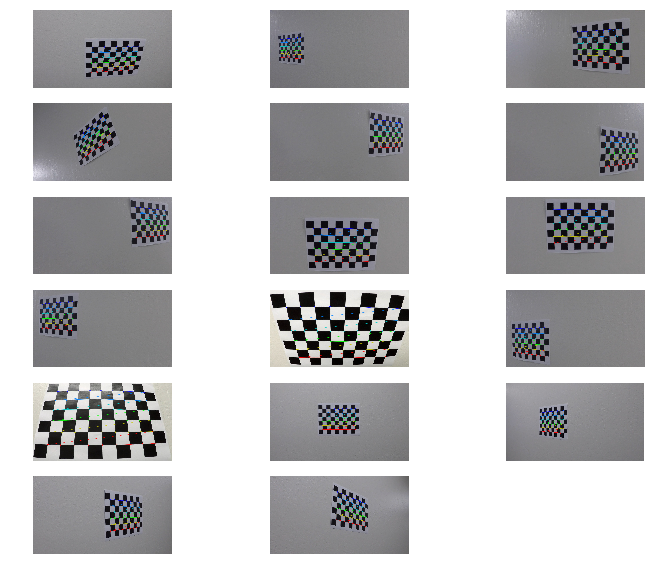

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.float32(np.zeros((6*9,3)))
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
#print(np.mgrid[0:9,0:6].T)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
img_size = None
index = 1
plt.figure(figsize=(12,10))
# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points
    if ret == True:
        img_size = (img.shape[1], img.shape[0])
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        p = plt.subplot(6, 3, index)
        p.axis("off")
        p.imshow(img)
        index += 1
    else:
        print("Warning!!! find chessboard corners failed in: ", fname)

# Caculate the distortion matrix
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

 I applied this distortion correction to the test image using the cv2.undistort() function  
![alt text][image1]

Undistorted test image saved in:  output_images/calibration5_undist.jpg




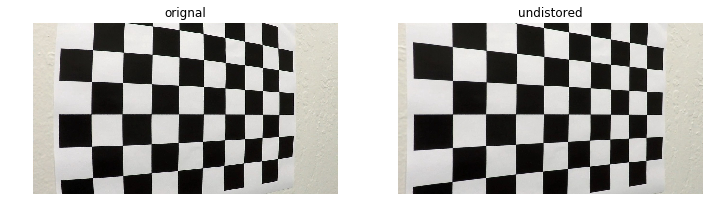

In [2]:
WHICH = 15
img = cv2.imread(images[WHICH])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_size = (img.shape[1], img.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
# Test undistortion on an image
undist = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(12,8))
p = plt.subplot(1, 2, 1)
p.axis("off")
p.set_title("orignal")
p.imshow(img)
p = plt.subplot(1, 2, 2)
p.axis("off")
p.set_title("undistored")
p.imshow(undist)

# save the undistored test image in output_images
out_fname = "output_images/" + os.path.splitext(os.path.basename(images[WHICH]))[0] + "_undist.jpg"
save = cv2.cvtColor(undist,cv2.COLOR_RGB2BGR)
if True == cv2.imwrite(out_fname, undist):
    print("Undistorted test image saved in: ", out_fname)
    print("\n")

### Pipeline (single images)  

#### 1. Provide an example of a distortion-corrected image.  
  
To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:  
![alt text][image2]  

Undistorted test image saved in:  output_images/test_undist.jpg




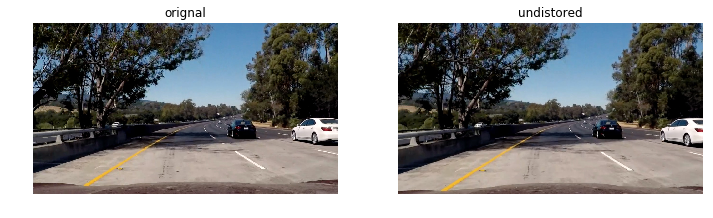

In [3]:
img = cv2.imread("test_images/test5.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_size = (img.shape[1], img.shape[0])
# Undistort on the image
undist = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(12,8))
p = plt.subplot(1, 2, 1)
p.axis("off")
p.set_title("orignal")
p.imshow(img)
p = plt.subplot(1, 2, 2)
p.axis("off")
p.set_title("undistored")
p.imshow(undist)

# save the undistored test image in output_images
out_fname = "output_images/test_undist.jpg"
save = cv2.cvtColor(undist,cv2.COLOR_RGB2BGR)
if True == cv2.imwrite(out_fname, save):
    print("Undistorted test image saved in: ", out_fname)
    print("\n")

#### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.  
    
I used a combination of color and gradient thresholds to generate a binary image.
1) Firstly I masked pixls not in color range [ Yellow, White ], in order to fiter out shadow along fence introducing false detection
1) color threshold is on S component of HLS    
2) gradient threshold is on the result of x Sobel    

![alt text][image3]  
![alt text][image4]  

Colored binary test image saved in output_images/test_color_binary.jpg

Combined binary test image saved in output_images/test_combined_binary.jpg



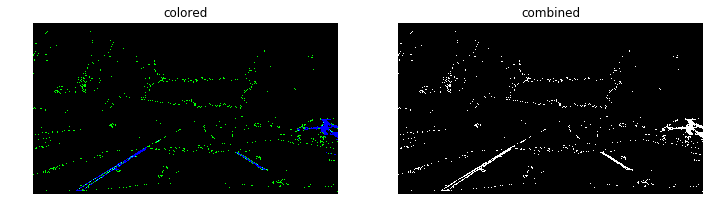

In [4]:
def pipeline(img, s_thresh=(120, 255), sx_thresh=(20, 100)):
    # All previous steps
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Setup inRange to mask off everything except white and yellow
    lower_yellow_white = np.array([140, 140, 64])
    upper_yellow_white = np.array([255, 255, 255])
    mask = cv2.inRange(undist, lower_yellow_white, upper_yellow_white)
    yellow_white = cv2.bitwise_and(undist, undist, mask=mask)

    ## Apply a gaussian blur
    #yellow_white = cv2.GaussianBlur(yellow_white, (5,5), 0)
    
    # Convert to HSV color space and separate out the s channel
    hls = np.float32(cv2.cvtColor(yellow_white, cv2.COLOR_RGB2HLS))
    l_channel = hls[:,:,1]  # for gray space
    s_channel = hls[:,:,2]  # for S space

    # Threshold color channel
    binary_s = np.zeros_like(s_channel)
    binary_s[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    ## Convert to grayscale
    #gray = cv2.cvtColor(yellow_white, cv2.COLOR_RGB2GRAY)

    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    binary_sobel = np.zeros_like(scaled_sobelx)
    binary_sobel[(scaled_sobelx >= sx_thresh[0]) & (scaled_sobelx <= sx_thresh[1])] = 1
    
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(binary_sobel), binary_sobel, binary_s))
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(binary_sobel)
    combined_binary[(binary_sobel == 1) | (binary_s == 1)] = 1
    
    return combined_binary, color_binary

img = cv2.imread("test_images/test5.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
combined_binary, color_binary = pipeline(img)

plt.figure(figsize=(12,8))
p = plt.subplot(1, 2, 1)
p.axis("off")
p.set_title("colored")
p.imshow(color_binary)
save = np.uint8(255* cv2.cvtColor(color_binary, cv2.COLOR_RGB2BGR))
if True == cv2.imwrite('output_images/test_color_binary.jpg', save):
    print("Colored binary test image saved in output_images/test_color_binary.jpg\n")
    
p = plt.subplot(1, 2, 2)
p.axis("off")
p.set_title("combined")
p.imshow(combined_binary, cmap="gray")
save = np.uint8(255* combined_binary)
if True == cv2.imwrite('output_images/test_combined_binary.jpg', save):
    print("Combined binary test image saved in output_images/test_combined_binary.jpg\n")


#### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.  
  
The code for my perspective transform includes a function called `unwarpe()/unwarp_one_step`. I chose the hardcode the source and destination points in the following manner:  

```
src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

```  
This resulted in the following source and destination points:  
  
| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |
  
I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.  
  
![alt text][image5]  

Undist test image saved in output_images/test_undist.jpg

Warped test image saved in output_images/test_warped.jpg



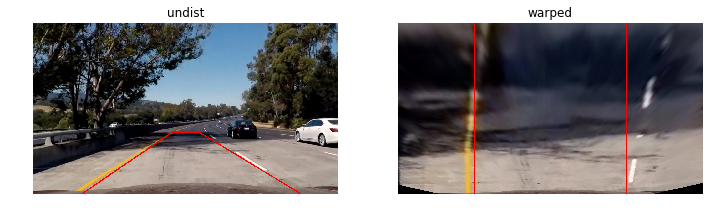

In [5]:
img = cv2.imread("test_images/test5.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_size = (img.shape[1], img.shape[0])

src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
# Given src and dst points, calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
    
def unwarp(img, img_size):
    # All previous steps
    combined_binary, color_binary = pipeline(img) 
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(combined_binary, M, img_size)
    return warped

def unwarp_single_step(img, img_size):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, img_size)
    return undist, warped 

undist, warped = unwarp_single_step(img, img_size)

# draw polylines on images
pts = np.int32(src.reshape((-1,1,2)))
undist = cv2.polylines(undist,[pts],True,(255,0,0), thickness=3)

pts = np.int32(dst.reshape((-1,1,2)))
warped = cv2.polylines(warped,[pts],True,(255,0,0), thickness=3)

plt.figure(figsize=(12,8))
p = plt.subplot(1, 2, 1)
p.axis("off")
p.set_title("undist")
p.imshow(undist)
save = cv2.cvtColor(undist, cv2.COLOR_RGB2BGR)
if True == cv2.imwrite('output_images/test_undist.jpg', save):
    print("Undist test image saved in output_images/test_undist.jpg\n")
    
p = plt.subplot(1, 2, 2)
p.axis("off")
p.set_title("warped")
p.imshow(warped)
save = cv2.cvtColor(warped, cv2.COLOR_RGB2BGR)
if True == cv2.imwrite('output_images/test_warped.jpg', save):
    print("Warped test image saved in output_images/test_warped.jpg\n")

#### 4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

1) For the first frame, I used sliding windows search approach. 
  
Firstly figured out left/right base locations by using histogram. Then set a window max(y)/9 to gather the pixels. With these pixels I got second order polynomials for left/right. Finally I caculated pixels with full range y axis with the polynomials. 

![alt text][image6]

Fit test image saved in output_images/test_fit.jpg



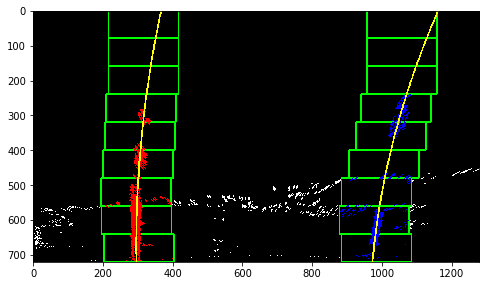

In [6]:
def find_lanes(img, img_size):
    # All previous steps
    binary_warped = unwarp(img, img_size)

    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])  # find the index with the Max value
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    # nonzero for all pixel=1
    nonzero = binary_warped.nonzero()
    #print(nonzero)
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), thickness=3) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), thickness=3) 
        # Identify the nonzero pixels in x and y within the window
        # nonzero for pixel=1 inside window (True)
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) \
                      & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) \
                       & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, num=binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    left_fit_pts = np.dstack((left_fitx, ploty))
    right_fit_pts = np.dstack((right_fitx, ploty))
    # draw polylines on the image
    pts = np.int32(left_fit_pts.reshape((-1,1,2)))
    out_img = cv2.polylines(out_img,[pts], False,(255,255,0), thickness=3)
    pts = np.int32(right_fit_pts.reshape((-1,1,2)))
    out_img = cv2.polylines(out_img,[pts], False,(255,255,0), thickness=3)

    return out_img, left_fit, right_fit, left_fitx, right_fitx, ploty

img = cv2.imread("test_images/test5.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_size = (img.shape[1], img.shape[0])
# left_fit, right_fit are for next frame, leftx,y are for measuring curvature
out_img, left_fit, right_fit, left_fitx, right_fitx, ploty = find_lanes(img, img_size)

plt.figure(figsize=(8,6))
plt.imshow(out_img)
#plt.plot(left_fitx, ploty, color='yellow')
#plt.plot(right_fitx, ploty, color='yellow')

save = cv2.cvtColor(out_img, cv2.COLOR_RGB2BGR)
if True == cv2.imwrite('output_images/test_fit.jpg', save):
    print("Fit test image saved in output_images/test_fit.jpg\n")

#### Apply the fit polynomial on a new frame  
  
2) For frames > 1 , I reused the fit polynomail from the previous frame, i.e., skipped the window search step, so to filter out the possible poped out objects which would change the detected lines abruptly  

Reused the previous fit polynomail to find the arounding pixels. Then used these pixels to fit a new second order polynomail . 
  
![alt text][image7]  

Fit other test image saved in output_images/test_fit_other.jpg



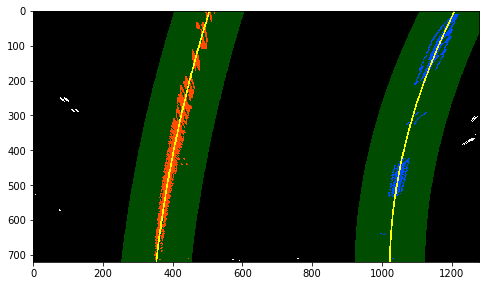

In [24]:
def find_lanes_with_fit(img, img_size, left_fit, right_fit):
    # All previous steps
    binary_warped = unwarp(img, img_size)

    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin))\
                  & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) \
                   & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, num=binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
  
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    out_img = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    left_fit_pts = np.dstack((left_fitx, ploty))
    right_fit_pts = np.dstack((right_fitx, ploty))
    # draw polylines on the image
    pts = np.int32(left_fit_pts.reshape((-1,1,2)))
    out_img = cv2.polylines(out_img,[pts], False,(255,255,0), thickness=3)
    pts = np.int32(right_fit_pts.reshape((-1,1,2)))
    out_img = cv2.polylines(out_img,[pts], False,(255,255,0), thickness=3)
    
    return out_img, left_fit, right_fit, left_fitx, right_fitx, ploty 

img = cv2.imread("test_images/test6.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_size = (img.shape[1], img.shape[0])
# left_fit, right_fit are for next frame, leftx,y are for measuring curvature
out_img, left_fit, right_fit, left_fitx, right_fitx, ploty = find_lanes_with_fit(img, img_size, left_fit, right_fit)

plt.figure(figsize=(8,6))
plt.imshow(out_img)
#plt.plot(left_fitx, ploty, color='yellow')
#plt.plot(right_fitx, ploty, color='yellow')
save = cv2.cvtColor(out_img, cv2.COLOR_RGB2BGR)
if True == cv2.imwrite('output_images/test_fit_other.jpg', save):
    print("Fit other test image saved in output_images/test_fit_other.jpg\n")


#### 5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.  
 
1) Curvature  
In order to get the 'meters' instead of 'pixel', I gave x axis a scale factor 3.7/700, y axis a scale factor 30/720 .  Then used the detected pixels to fit new left/right second order polynamials.
   
2) Vehicl respect to center  
I used the detected left/right pixels to average a 'middle' pixels, then used it to fit a second order polynamial. With the polynamial, I caculated the x axis meter of bottom most pixel, then subtract the image middle pix scaled.   

In [39]:
def measure_curvature_and_center_bias(img, img_size, fit={}, verbose=False):
    # All previous steps
    left_fitx = None
    right_fitx = None
    ploty = None
    # The first frame
    if not fit:
        lane_image, left_fit, right_fit, left_fitx, right_fitx, ploty \
                = find_lanes(img, img_size)
        # Update fit
        fit["left_fit"] = left_fit
        fit["right_fit"] = right_fit
    else:
        out_img, left_fit, right_fit, left_fitx, right_fitx, ploty \
                = find_lanes_with_fit(img, img_size, fit["left_fit"], fit["right_fit"])    
        # Update fit
        fit["left_fit"] = left_fit
        fit["right_fit"] = right_fit    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) /\
        np.absolute(2*left_fit_cr[0])  
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) /\
        np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    str_curv =  'Curvature: Left: {0}m, Right: {1}m.'.format(round(left_curverad, 2), round(right_curverad, 2))
    if verbose:
        print(str_curv, "\n")
        
    middle_fitx = (left_fitx + right_fitx) /2
    # Fit middle polynomials in world space
    middle_fit_cr = np.polyfit(ploty*ym_per_pix, middle_fitx*xm_per_pix, 2)
    # Caculate the bottom most pixel
    car_middle = middle_fit_cr[0]*ploty[-1]*ym_per_pix**2 + middle_fit_cr[1]*ploty[-1]*ym_per_pix + middle_fit_cr[2]
    screen_middle = img.shape[1]/2 * xm_per_pix
    meters_off_center = car_middle - screen_middle
    str_bias =  'Car bias: {0}m'.format(round(meters_off_center, 2))
    if verbose:
        print(str_bias, "\n")
    
    # Create an image to draw the lines on
    color_warp = np.uint8(np.zeros_like(img))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, img_size) 
    # Combine the result with the original image
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    out_img = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    # Put Car center bias on the image
    cv2.putText(out_img, str_bias, (0, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)
    # Put curvature on the image
    cv2.putText(out_img, str_curv, (0, 160), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)
    
    return out_img
    
img = cv2.imread("test_images/test5.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_size = (img.shape[1], img.shape[0])

out_img = measure_curvature_and_center_bias(img, img_size, verbose=True)


Curvature: Left: 1037.07m, Right: 677.57m. 

Car bias: -0.58m 



#### 6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.  
  
I implemented this step in lines # through # in my code in `yet_another_file.py` in the function `map_lane()`.  Here is an example of my result on a test image:  

![alt text][image8]


Measure curvature test image saved in output_images/test_curvature.jpg



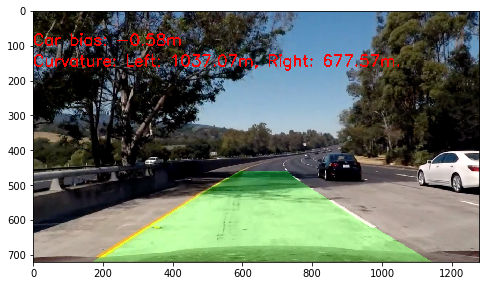

In [40]:
plt.figure(figsize=(8,6))
plt.imshow(out_img)
save = cv2.cvtColor(out_img,cv2.COLOR_RGB2BGR)
if True == cv2.imwrite('output_images/test_curvature.jpg', save):
    print("Measure curvature test image saved in output_images/test_curvature.jpg\n")

### Pipeline (video)  
  
#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).  

https://www.youtube.com/watch?v=hGf98e8kEXI  


In [10]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [41]:
def process_image(img):
    img_size = (img.shape[1], img.shape[0])
    out_img = measure_curvature_and_center_bias(img, img_size)
    return out_img

movie_output = 'test_project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
movie_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time movie_clip.write_videofile(movie_output, audio=False)

[MoviePy] >>>> Building video test_project_video.mp4
[MoviePy] Writing video test_project_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [03:16<00:00,  6.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_project_video.mp4 

Wall time: 3min 17s


In [42]:
HTML("""
<video width="640" height="480" controls>
  <source src="{0}">
</video>
""".format(movie_output))


### Discussion  
  
#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?  
  
1) it previously failed in shadow along the road fence which detected as a false lane line. I had to mask out color out of color range [Yellow, White] before color/gradient pixel detection.  
  
2) There were unstable positions when went through shadows, so from the second frame I used the fit polynomial from the previous frame to do the pixel detections ( restricted in an area ). So could filter out abruptly poped up objects.  
